In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set the path to your dataset
dataset_path = '/content/drive/MyDrive/FIR_Details_Data.csv'

In [ ]:
# Load the dataset
df = pd.read_csv(dataset_path)
df

<ipython-input-20-55906d9e9c77>:2: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)


,District_Name,UnitName,FIRNo,RI,Year,Month,Offence_From_Date,Offence_To_Date,FIR_Reg_DateTime,FIR_Date,...,VICTIM COUNT,Accused Count,Arrested Male,Arrested Female,Arrested Count\tNo.,Accused_ChargeSheeted Count,Conviction Count,FIR_ID,Unit_ID,Crime_No
0,Bagalkot,Amengad PS,0001/2016,1,2016,1,2015-12-27 12:00:00.000,2015-12-27 12:05:00.000,2016-01-05 11:00:00.000,05/01/2016,...,0,1,1,0,1,1,0,2016000002,1245,10470124520160001
1,Bagalkot,Amengad PS,0002/2016,1,2016,1,2016-01-12 17:30:00.000,2016-01-12 17:35:00.000,2016-01-12 19:00:00.000,12/01/2016,...,0,5,5,0,5,5,2,2016000003,1245,10470124520160002
2,Bagalkot,Amengad PS,0003/2016,1,2016,1,2016-01-12 17:45:00.000,2016-01-12 17:50:00.000,2016-01-12 19:30:00.000,12/01/2016,...,0,1,1,0,1,1,0,2016000004,1245,10470124520160003
3,Bagalkot,Amengad PS,0004/2016,1,2016,1,2016-01-14 21:30:00.000,2016-01-14 21:35:00.000,2016-01-15 14:00:00.000,15/01/2016,...,0,1,1,0,1,1,0,2016000005,1245,10470124520160004
4,Bagalkot,Amengad PS,0005/2016,1,2016,1,2016-01-18 15:00:00.000,2016-01-18 15:05:00.000,2016-01-18 19:30:00.000,18/01/2016,...,0,1,1,0,1,1,0,2016000006,1245,10470124520160005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694186,Yadgir,Yadgiri Women PS,0002/2024,1,2024,1,2024-01-10 05:30:00.000,2024-01-10 21:30:00.000,2024-01-11 21:30:00.000,11/01/2024,...,0,0,0,0,0,0,0,2024000002,2183,10978218320240002
1694187,Yadgir,Yadgiri Women PS,0003/2024,1,2024,1,2024-01-19 22:30:00.000,2024-01-19 22:35:00.000,2024-01-29 19:30:00.000,29/01/2024,...,0,1,0,0,0,0,0,2024000003,2183,10978218320240003
1694188,Yadgir,Yadgiri Women PS,0004/2024,1,2024,2,2024-02-06 15:42:00.000,2024-02-06 15:45:00.000,2024-02-07 17:45:00.000,07/02/2024,...,0,1,0,0,0,0,0,2024000004,2183,10978218320240004
1694189,Yadgir,Yadgiri Women PS,0005/2024,1,2024,2,2024-02-19 12:10:00.000,2024-02-19 12:15:00.000,2024-02-24 17:00:00.000,24/02/2024,...,0,5,0,0,0,0,0,2024000005,2183,10978218320240005


In [ ]:
df = df[['FIR_Date','Accused_ChargeSheeted Count']]
df

,FIR_Date,Accused_ChargeSheeted Count
0,05/01/2016,1
1,12/01/2016,5
2,12/01/2016,1
3,15/01/2016,1
4,18/01/2016,1
...,...,...
1694186,11/01/2024,0
1694187,29/01/2024,0
1694188,07/02/2024,0
1694189,24/02/2024,0


In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

<ipython-input-23-09197b2eb87f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FIR_Date'] = pd.to_datetime(df['FIR_Date'], format='mixed', dayfirst=True)


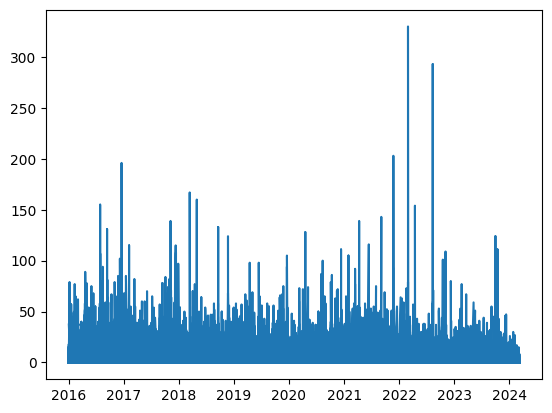

In [ ]:
import matplotlib.pyplot as plt

# Increase the chunk size to a value greater than 100
plt.rcParams['agg.path.chunksize'] = 10000

# Plot the data again
df['FIR_Date'] = pd.to_datetime(df['FIR_Date'], format='mixed', dayfirst=True)
plt.plot(df['FIR_Date'], df['Accused_ChargeSheeted Count'])
plt.show()

In [ ]:
df

,FIR_Date,Accused_ChargeSheeted Count
0,2016-01-05,1
1,2016-01-12,5
2,2016-01-12,1
3,2016-01-15,1
4,2016-01-18,1
...,...,...
1694186,2024-01-11,0
1694187,2024-01-29,0
1694188,2024-02-07,0
1694189,2024-02-24,0


In [ ]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    df.set_index('FIR_Date', inplace=True)

    for i in range(1, n_steps+1):
        df[f'Accused_ChargeSheeted Count(t-{i})'] = df['Accused_ChargeSheeted Count'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(df, lookback)
shifted_df

,Accused_ChargeSheeted Count,Accused_ChargeSheeted Count(t-1),Accused_ChargeSheeted Count(t-2),Accused_ChargeSheeted Count(t-3),Accused_ChargeSheeted Count(t-4),Accused_ChargeSheeted Count(t-5),Accused_ChargeSheeted Count(t-6),Accused_ChargeSheeted Count(t-7)
FIR_Date,,,,,,,,
2016-01-20,1,1.0,1.0,1.0,1.0,1.0,5.0,1.0
2016-01-21,2,1.0,1.0,1.0,1.0,1.0,1.0,5.0
2016-01-22,5,2.0,1.0,1.0,1.0,1.0,1.0,1.0
2016-01-24,2,5.0,2.0,1.0,1.0,1.0,1.0,1.0
2016-01-25,1,2.0,5.0,2.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
2024-01-11,0,1.0,0.0,0.0,3.0,1.0,1.0,5.0
2024-01-29,0,0.0,1.0,0.0,0.0,3.0,1.0,1.0
2024-02-07,0,0.0,0.0,1.0,0.0,0.0,3.0,1.0


In [ ]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[1., 1., 1., ..., 1., 5., 1.],
       [2., 1., 1., ..., 1., 1., 5.],
       [5., 2., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 3., 1.],
       [0., 0., 0., ..., 0., 0., 3.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
shifted_df_as_np.shape

(1694184, 8)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.99393939, -0.99393939, -0.99393939, ..., -0.99393939,
        -0.96969697, -0.99393939],
       [-0.98787879, -0.99393939, -0.99393939, ..., -0.99393939,
        -0.99393939, -0.96969697],
       [-0.96969697, -0.98787879, -0.99393939, ..., -0.99393939,
        -0.99393939, -0.99393939],
       ...,
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -0.98181818, -0.99393939],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -0.98181818],
       [-1.        , -1.        , -1.        , ..., -0.99393939,
        -1.        , -1.        ]])

In [ ]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((1694184, 7), (1694184,))

In [ ]:
X = dc(np.flip(X, axis=1))
X

array([[-0.99393939, -0.96969697, -0.99393939, ..., -0.99393939,
        -0.99393939, -0.99393939],
       [-0.96969697, -0.99393939, -0.99393939, ..., -0.99393939,
        -0.99393939, -0.99393939],
       [-0.99393939, -0.99393939, -0.99393939, ..., -0.99393939,
        -0.99393939, -0.98787879],
       ...,
       [-0.99393939, -0.98181818, -1.        , ..., -0.99393939,
        -1.        , -1.        ],
       [-0.98181818, -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -0.99393939, ..., -1.        ,
        -1.        , -1.        ]])

In [ ]:
split_index = int(len(X) * 0.95)

split_index

1609474

In [ ]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1609474, 7), (84710, 7), (1609474,), (84710,))

In [ ]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1609474, 7, 1), (84710, 7, 1), (1609474, 1), (84710, 1))

In [ ]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1609474, 7, 1]),
 torch.Size([84710, 7, 1]),
 torch.Size([1609474, 1]),
 torch.Size([84710, 1]))

In [ ]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [ ]:
train_dataset

In [ ]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [ ]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [ ]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Streaming output truncated to the last 5000 lines.
Batch 5000, Loss: 0.000
Batch 5100, Loss: 0.000
Batch 5200, Loss: 0.000
Batch 5300, Loss: 0.000
Batch 5400, Loss: 0.000
Batch 5500, Loss: 0.000
Batch 5600, Loss: 0.000
Batch 5700, Loss: 0.000
Batch 5800, Loss: 0.000
Batch 5900, Loss: 0.000
Batch 6000, Loss: 0.000
Batch 6100, Loss: 0.000
Batch 6200, Loss: 0.000
Batch 6300, Loss: 0.000
Batch 6400, Loss: 0.000
Batch 6500, Loss: 0.000
Batch 6600, Loss: 0.000
Batch 6700, Loss: 0.000
Batch 6800, Loss: 0.000
Batch 6900, Loss: 0.000
Batch 7000, Loss: 0.000
Batch 7100, Loss: 0.000
Batch 7200, Loss: 0.002
Batch 7300, Loss: 0.000
Batch 7400, Loss: 0.000
Batch 7500, Loss: 0.000
Batch 7600, Loss: 0.000
Batch 7700, Loss: 0.000
Batch 7800, Loss: 0.000
Batch 7900, Loss: 0.000
Batch 8000, Loss: 0.000
Batch 8100, Loss: 0.000
Batch 8200, Loss: 0.001
Batch 8300, Loss: 0.000
Batch 8400, Loss: 0.000
Batch 8500, Loss: 0.000
Batch 8600, Loss: 0.000
Batch 8700, Loss: 0.000
Batch 8800, Loss: 0.000
Batch 8900, L

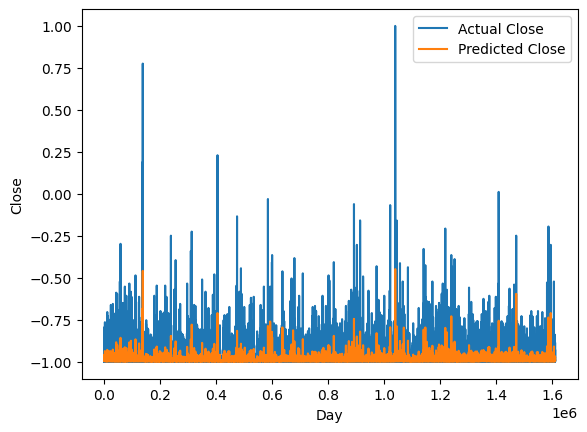

In [ ]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [ ]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([1.2115252 , 1.20479822, 1.26550823, ..., 2.57872492, 1.89878851,
       1.89791322])

In [ ]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([0.99999905, 1.99999809, 4.99999523, ..., 0.99999905, 1.99999809,
       0.99999905])

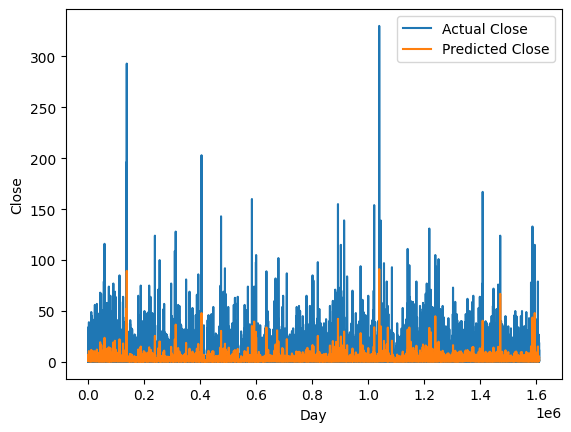

In [ ]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [ ]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([1.68693781, 1.63425297, 1.70498461, ..., 0.89368522, 0.85432649,
       0.77992648])

In [ ]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([0.99999905, 1.99999809, 2.99999714, ..., 0.        , 0.        ,
       0.        ])

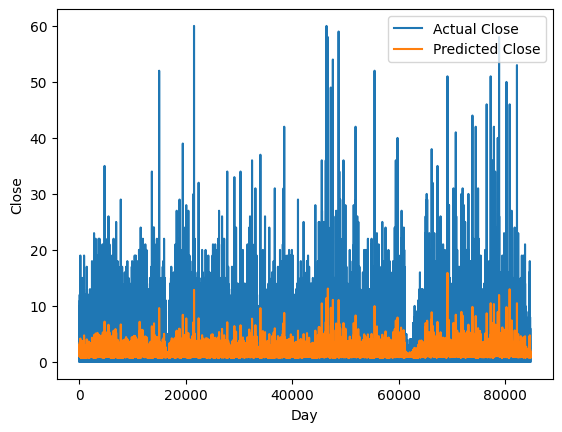

In [ ]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Mean Absolute Error
mae_train = mean_absolute_error(new_y_train, train_predictions)
mae_test = mean_absolute_error(new_y_test, test_predictions)

print(f'Train MAE: {mae_train}')
print(f'Test MAE: {mae_test}')

# Mean Squared Error
mse_train = mean_squared_error(new_y_train, train_predictions)
mse_test = mean_squared_error(new_y_test, test_predictions)

print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')

# Root Mean Squared Error
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print(f'Train RMSE: {rmse_train}')
print(f'Test RMSE: {rmse_test}')


Train MAE: 1.2600956263694074
Test MAE: 1.7233179523149469
Train MSE: 5.958703708179715
Test MSE: 9.35633663520129
Train RMSE: 2.441045617799822
Test RMSE: 3.058812945441628
